<a href="https://colab.research.google.com/github/gulnuravci/machine_learning_w_pytorch_scikitlearn/blob/main/ch_2_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

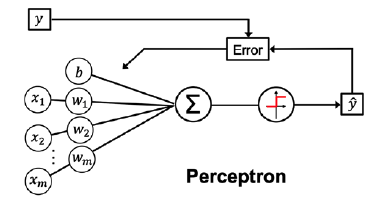

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [ ]:
class Perceptron:
  def __init__(self, learning_rate=0.01, epochs=50, random_seed=42):
    """
    Perceptron classifier.

    Parameters:
    learning_rate : float
      Learning rate (between 0.0 and 1.0)
    epochs : int
      Passes over the training dataset.
    random_seed : int
      Random number generator seed for
      random weight initialization.

    Attributes:
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.random_seed = random_seed

  def fit(self, X, y):
    """
    Fit training data.

    Parameters:
    X : {array-like}, shape = [n_examples, n_features]
      Training vecotrs, where n_examples is the number of
      examples and n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values.

    Returns:
    self : object
    """
    r_gen = np.random.RandomState(self.random_seed)
    # generate as many random weights as there are features
    self.w_ = r_gen.normal(loc=0.0,
                          scale=0.01,
                          size=X.shape[1])
    # creates a NumPy scalar of type numpy.float64 with the value 0.0.
    self.b_ = np.float_(0.0)
    self.errors_ = []

    for _ in range(self.epochs):
      errors = 0
      for xi, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)

    return self

  def net_input(self, X):
    """Calculate net input."""
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    """Return class label after unit step."""
    return np.where(self.net_input(X) >= 0.0, 1, 0)

numpy.random.RandomState.normal: https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html#numpy-random-randomstate-normal

*   loc - Mean (“centre”) of the distribution.
*   scale - Standard deviation (spread or “width”) of the distribution. Must be non-negative.
*   size - Output shape.


via textbook: Technically, we could initialize the weights to zero (in fact, this is done in the original perceptron algorithm).
However, if we did that, then the learning rate 𝜂 would have no effect on the decision
boundary. If all the weights are initialized to zero, the learning rate parameter affects only the
scale of the weight vector, not the direction.

via textbook:

**Vectorization: Replacing for loops with vectorized code**

Instead of using NumPy to calculate the vector dot product between two arrays, a and b,
via a.dot(b) or np.dot(a, b), we could also perform the calculation in pure Python
via sum([i * j for i, j in zip(a, b)]). However, the advantage of using NumPy
over classic Python for loop structures is that its arithmetic operations are vectorized.
Vectorization means that an elemental arithmetic operation is automatically applied to
all elements in an array. By formulating our arithmetic operations as a sequence of instructions
on an array, rather than performing a set of operations for each element at a
time, we can make better use of our modern central processing unit (CPU) architectures
with single instruction, multiple data (SIMD) support. Furthermore, NumPy uses highly
optimized linear algebra libraries, such as Basic Linear Algebra Subprograms (BLAS) and
Linear Algebra Package (LAPACK), that have been written in C or Fortran. Lastly, NumPy
also allows us to write our code in a more compact and intuitive way using the basics of
linear algebra, such as vector and matrix dot products.

via textbook: The OvA method for multi-class classification
OvA, which is sometimes also called one-versus-rest (OvR), is a technique that allows us to
extend any binary classifier to multi-class problems. Using OvA, we can train one classifier
per class, where the particular class is treated as the positive class and the examples from
all other classes are considered negative classes. If we were to classify a new, unlabeled
data instance, we would use our n classifiers, where n is the number of class labels, and
assign the class label with the highest confidence to the particular instance we want to
classify. In the case of the perceptron, we would use OvA to choose the class label that is
associated with the largest absolute net input value.

In [ ]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [ ]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 5)

The 0-50 is Iris-setosa, 50-100 is Iris-versicolor, 100-150 is Iris-virginica.

In [ ]:
# select setosa and versicolor
# get the fifth column for rows 0-99
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# mark setosa as 0 and versicolor as 1
# these are the class labels
y = np.where(y == "Iris-setosa", 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# get two features:
# sepal length at column 0
# petal length at column 2
# get column 0 and 2 for rows 0-99
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

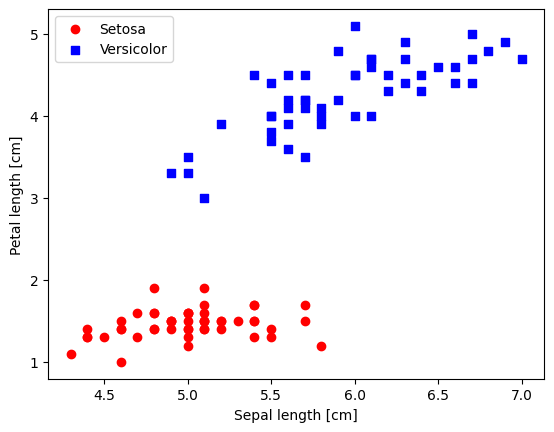

In [ ]:
# plot data
# setosa (rows 0-49) sepal length (col 0)
# setosa (rows 0-49) petal length (col 1)
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
# versicolor (rows 50-99) sepal length (col 0)
# versicolor (rows 50-99) petal length (col 1)
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

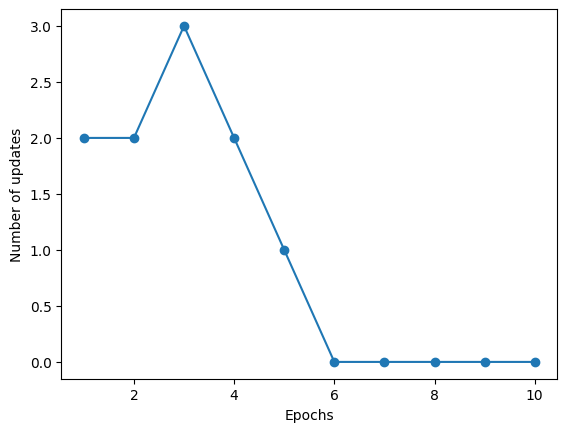

In [ ]:
ppn = Perceptron(learning_rate=0.1, epochs=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

Note that the number of misclassification errors and the number of updates is the same, since the
perceptron weights and bias are updated each time it misclassifies an example.

numpy.meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

numpy.arange: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

numpy.ravel: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

numpy.reshape: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')  # Marker symbols for different classes
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  # Colors for different classes
    cmap = ListedColormap(colors[:len(np.unique(y))])  # Create a colormap based on unique class labels

    # Define the ranges for the grid (meshgrid) based on the input feature data X
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Range for feature 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Range for feature 2

    # Create a meshgrid using the defined ranges and resolution
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict the class labels for each point in the meshgrid
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("lab shape: ", lab.shape)  # Print the shape of the predicted labels
    lab = lab.reshape(xx1.shape)  # Reshape the predicted labels to match the shape of the meshgrid
    print("xx1.shape: ", xx1.shape)  # Print the shape of the meshgrid

    # Plot the decision regions based on the predicted labels
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())  # Set the x-axis limits
    plt.ylim(xx2.min(), xx2.max())  # Set the y-axis limits

    # Plot the data points for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],  # X coordinates for points of class cl
                    y=X[y == cl, 1],  # Y coordinates for points of class cl
                    alpha=0.8,  # Transparency of markers
                    c=colors[idx],  # Color for points of class cl
                    marker=markers[idx],  # Marker symbol for points of class cl
                    label=f'Class {cl}',  # Label for the legend
                    edgecolor='black')  # Edge color of markers


lab shape:  (71675,)
xx1.shape:  (305, 235)


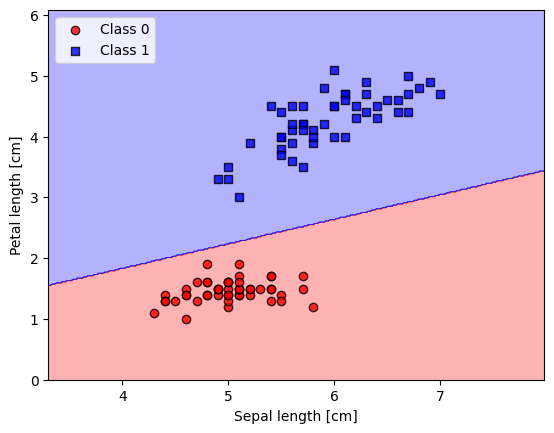

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()